#Data Transformation

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow import keras
from tensorflow.keras.layers import Input, Embedding, Dense
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras import Model
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.inputs.tf_keras import PlotLossesCallback

! pip install transformers
! pip install datasets
! pip install seqeval
! pip install huggingface_hub
!pip install -U tensorflow-addons

import tensorflow_addons as tfa
from transformers import TFAutoModelForTokenClassification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 11.6 MB/s 
     |████████████████████████████████| 596 kB 57.7 MB/s 
     |████████████████████████████████| 6.6 MB 47.1 MB/s 
     |████████████████████████████████| 86 kB 3.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 15.8 MB/s 
     |████████████████████████████████| 1.1 MB 53.3 MB/s 
     |████████████████████████████████| 140 kB 16.1 MB/s 
     |████████████████████████████████| 212 kB 44.2 MB/s 
     |████████████████████████████████| 127 kB 55.2 MB/s 
     |████████████████████████████████| 144 kB 67.0 MB/s 
     |████████████████████████████████| 271 kB 74.6 MB/s 
     |███████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.4 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=07f4ee42de88764e7cda4ddd2baa2c0332a75697a92b18e78442a1f4e751eedc
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 29.4 MB/s 


In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-ef777cs2
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-ef777cs2


In [ ]:
pip install livelossplot==0.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataset = pd.read_json('/content/drive/MyDrive/AI3/NER Project/WIESP2022-NER-TRAINING.jsonl', lines = True)

In [ ]:
dataset

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...",fulltext,"[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,2018MNRAS.478.5533F,1129,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[comparison, once, the, angular, positions, of...",fulltext_1129_2018MNRAS.478.5533F
2,2018MNRAS.480.3062L,1086,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",acknowledgments,"[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
3,2016MNRAS.457.1786M,1135,"[22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...","[B-Person, O, O, O, O, B-Organization, B-Grant...",acknowledgments,"[BDM, gratefully, acknowledges, support, from,...",acknowledgments_1135_2016MNRAS.457.1786M
4,2019MNRAS.482L...9B,559,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...",acknowledgments,"[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B
...,...,...,...,...,...,...,...
1748,2021ApJ...913...18B,327,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[14.0,, is, notable., If, O, vi, arises, prima...",fulltext_327_2021ApJ...913...18B
1749,2018A&A...614A..23K,1320,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 1, 32...","[O, O, O, O, O, O, O, O, O, O, B-CelestialObje...",fulltext,"[~, 2–3, ×, 10, 12, G), magnetic, field, stren...",fulltext_1320_2018A&A...614A..23K
1750,2018MNRAS.479.2308B,310,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",acknowledgments,"[ACKNOWLEDGEMENTS, We, are, grateful, to, the,...",acknowledgments_310_2018MNRAS.479.2308B
1751,2016MNRAS.462.4157A,1569,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[amount, of, condensation., It, appears, that,...",fulltext_1569_2016MNRAS.462.4157A


In [ ]:
data = dataset[['ner_ids', 'ner_tags', 'tokens']]
data['idx'] = np.arange(0, len(data))
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ner_ids,ner_tags,tokens,idx
0,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...","[Whilst, a, reasonable, harmonic, fit, to, the...",0
1,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[comparison, once, the, angular, positions, of...",1
2,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",2
3,"[22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...","[B-Person, O, O, O, O, B-Organization, B-Grant...","[BDM, gratefully, acknowledges, support, from,...",3
4,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...","[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",4
...,...,...,...,...
1748,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[14.0,, is, notable., If, O, vi, arises, prima...",1748
1749,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 1, 32...","[O, O, O, O, O, O, O, O, O, O, B-CelestialObje...","[~, 2–3, ×, 10, 12, G), magnetic, field, stren...",1749
1750,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[ACKNOWLEDGEMENTS, We, are, grateful, to, the,...",1750
1751,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[amount, of, condensation., It, appears, that,...",1751


In [ ]:
data_explode = data.explode(['ner_ids', 'ner_tags', 'tokens'], ignore_index = False)
data_explode.shape

(573132, 4)

In [ ]:
data_explode.set_index('idx', inplace = True)

In [ ]:
# Train test split
index = np.unique(data_explode.index)

train_index, val_index = train_test_split(index, train_size=0.8)

df_train = data_explode.loc[train_index]
df_val = data_explode.loc[val_index]

In [ ]:
ent, count = np.unique(df_train.ner_tags.values, return_counts = True)

In [ ]:
# Remove characters
df_train.tokens = df_train.tokens.str.replace("[^a-zA-Z0-9 ]",'')
df_val.tokens = df_val.tokens.str.replace("[^a-zA-Z0-9 ]",'')

# Tokenize the words
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=None,
                                                filters='\'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                lower=True,
                                                split=' ',) # Initialize

tokenizer.fit_on_texts(df_train.tokens.values) # Fit on training data

# Transform to numeric
tokens_train = tokenizer.texts_to_sequences(df_train.tokens.values)
tokens_val   = tokenizer.texts_to_sequences(df_val.tokens.values)

# Remove empty elements
b = np.array([token!=[] for token in tokens_train])
df_train = df_train.iloc[b,:]
tokens_train = np.array(tokens_train)[b]

b = np.array([token!=[] for token in tokens_val])
df_val = df_val.iloc[b,:]
tokens_val = np.array(tokens_val)[b]

df_train.tokens = tokens_train
df_val.tokens = tokens_val


df_train.tokens=df_train.tokens.map(lambda x: x[0])
df_val.tokens=  df_val.tokens.map(lambda x: x[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do th

In [ ]:
numlabels = len(np.unique(data_explode.ner_tags.values))

In [ ]:
IDs_train = df_train.index.unique()

train_sentences = []
train_tags = []
train_Ns = []
for i in IDs_train: # For each id
    sel = df_train.loc[i] # We extract the respective data
    if len(sel.shape)<2: # If the data is not formatted properly
        continue # Ommit that id
        
    sentence = sel.tokens.values # A sentence is a list of tokens
    tag = sel['ner_ids'].values # The tags correspond to each token
    
    train_sentences.append(sentence)  # We store the sentences in a list
    train_tags.append(tag)            # We do the same with the tags
    train_Ns.append(sentence.shape[0])# And store the length of the sentence
    
# We transform everything into np arrays    
train_Ns = np.array(train_Ns)
train_sentences = np.array(train_sentences)
train_tags = np.array(train_tags)    

# For simplicity, we create a padded array beforehand
train_sentences = tf.keras.preprocessing.sequence.pad_sequences(train_sentences, padding='post')
train_tags = tf.keras.preprocessing.sequence.pad_sequences(train_tags, padding='post')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
# We create the training set structure
IDs_val = df_val.index.unique()

val_sentences = []
val_tags = []
val_Ns = []
for i in IDs_val: # For each id
    sel = df_val.loc[i] # We extract the respective data
    if len(sel.shape)<2: # If the data is not formatted properly
        continue # Ommit that id
        
    sentence = sel.tokens.values # A sentence is a list of tokens
    tag = sel['ner_ids'].values # The tags correspond to each token
    
    val_sentences.append(sentence)  # We store the sentences in a list
    val_tags.append(tag)            # We do the same with the tags
    val_Ns.append(sentence.shape[0])# And store the length of the sentence
    
# We transform everything into np arrays    
val_Ns = np.array(val_Ns)
val_sentences = np.array(val_sentences)
val_tags = np.array(val_tags)    

# For simplicity, we create a padded array beforehand
val_sentences = tf.keras.preprocessing.sequence.pad_sequences(val_sentences, padding='post')
val_tags = tf.keras.preprocessing.sequence.pad_sequences(val_tags, padding='post')

In [ ]:
len(train_tags)

1402

##Making Multiple SimpleRNN models

In [ ]:
hidden_sizes = [8, 32]
vocab_size = len(tokenizer.word_counts)

In [ ]:
def make_model(hidden_size, layers, bidir = False):
    tf.keras.backend.clear_session()
    sentence_input1 = tf.keras.Input(shape=(None,), name='sentence_input')

    word_embedding = tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=hidden_size, 
                        name='word_embedding', mask_zero=True)
    masked_embeddinbg = word_embedding(sentence_input1)
    
    h_f = []
    h_b = []
    # First Forward RNN layer
    RNN = tf.keras.layers.SimpleRNN(hidden_size, return_sequences=True)
    hf = RNN(masked_embeddinbg)
    h_f.append(hf)
    if bidir:
        RNN = tf.keras.layers.SimpleRNN(hidden_size, return_sequences=True, go_backwards=True)
        hb = RNN(masked_embeddinbg)
        h_b.append(hb)
        

    # Create forward RNNs
    for k in range(1,layers):
        RNN_f = tf.keras.layers.SimpleRNN(hidden_size, return_sequences=True)
        hf = RNN_f(hf)
        h_f.append(hf)

        if bidir:
            RNN_b = tf.keras.layers.SimpleRNN(hidden_size, return_sequences=True, go_backwards=True)
            hb = RNN_b(hb)
            h_b.append(hb)
    
    if bidir:
        if layers==1:
            h = tf.keras.layers.concatenate([hf, hb])        
        else:
            h = tf.keras.layers.concatenate(h_f+h_b)
    else:
        if layers==1:
            h = h_f[0]
        else:
            h = tf.keras.layers.concatenate(h_f)
          
    
    dense = tf.keras.layers.Dense(len(np.unique(data_explode.ner_tags.values)), activation='softmax', )
    output = dense(h)

    model = tf.keras.Model(inputs=sentence_input1, outputs=output, name='_'.join([str(hidden_size), str(layers),str(bidir)]))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = 'accuracy')
    return model

In [ ]:
# Create models

models_a = []
models_b = []
models_c = []
models_d = []
for h in hidden_sizes:
    print(h)
    models_a.append(make_model(h,1, bidir=False))
    
    models_b.append(make_model(h,2, bidir=False))
    models_b.append(make_model(h,3, bidir=False))
    
    models_c.append(make_model(h,1, bidir=True))
    
    models_d.append(make_model(h,2, bidir=True))
    models_d.append(make_model(h,3, bidir=True))
    

8
32


In [ ]:
# Train all the models
histories= []
models_list = [models_a,models_b,models_c,models_d]
for model_list in models_list:
  for model in model_list:
    print(model.name)


    history = model.fit(train_sentences
                          , train_tags
                          , validation_data = (val_sentences,val_tags)
                          , epochs=20
                          , batch_size=1024
                          , verbose=2)
    histories.append(history)

8_1_False
Epoch 1/20
2/2 - 3s - loss: 1.1624 - accuracy: 0.8277 - val_loss: 1.4205 - val_accuracy: 0.8572 - 3s/epoch - 2s/step
Epoch 2/20
2/2 - 3s - loss: 1.1492 - accuracy: 0.8277 - val_loss: 1.4033 - val_accuracy: 0.8572 - 3s/epoch - 1s/step
Epoch 3/20
2/2 - 3s - loss: 1.1359 - accuracy: 0.8277 - val_loss: 1.3861 - val_accuracy: 0.8572 - 3s/epoch - 1s/step
Epoch 4/20
2/2 - 3s - loss: 1.1226 - accuracy: 0.8277 - val_loss: 1.3687 - val_accuracy: 0.8572 - 3s/epoch - 1s/step
Epoch 5/20
2/2 - 3s - loss: 1.1093 - accuracy: 0.8277 - val_loss: 1.3512 - val_accuracy: 0.8572 - 3s/epoch - 1s/step
Epoch 6/20
2/2 - 3s - loss: 1.0959 - accuracy: 0.8277 - val_loss: 1.3337 - val_accuracy: 0.8572 - 3s/epoch - 1s/step
Epoch 7/20
2/2 - 3s - loss: 1.0825 - accuracy: 0.8277 - val_loss: 1.3162 - val_accuracy: 0.8572 - 3s/epoch - 1s/step
Epoch 8/20
2/2 - 3s - loss: 1.0690 - accuracy: 0.8277 - val_loss: 1.2988 - val_accuracy: 0.8572 - 3s/epoch - 2s/step
Epoch 9/20
2/2 - 3s - loss: 1.0556 - accuracy: 0.8277 

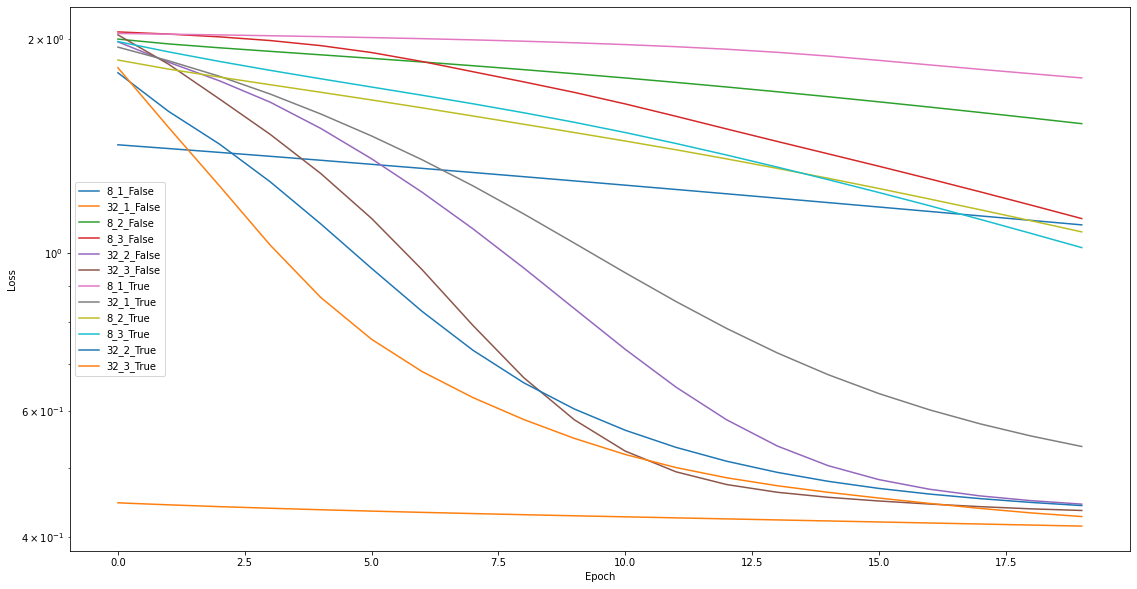

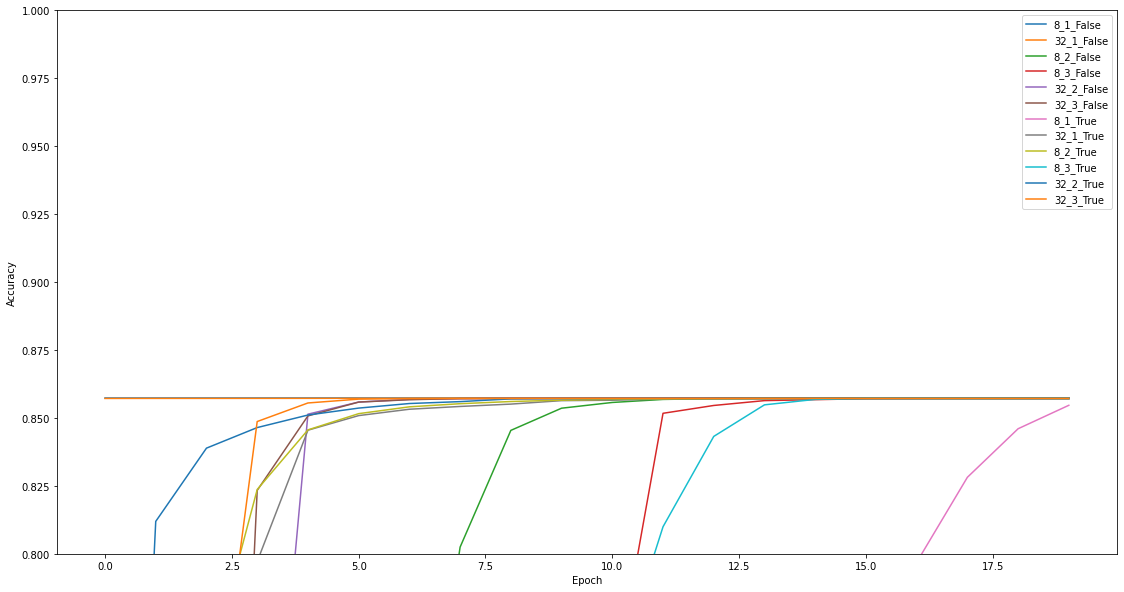

In [ ]:
plt.figure(figsize=(19,10))
for history in histories:
    plt.plot(history.history['val_loss'], label=history.model.name)
plt.legend(loc=0)
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(19,10))
for history in histories:
    plt.plot(history.history['val_accuracy'], label=history.model.name)
plt.legend(loc=0)
plt.ylim(0.8,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()                                                                   

As can be seeen above, our BaseLine Model with two SimpleRNN layers has achieved a validation accuracy of 82% 

#LSTM - Bidirectional Model




In [ ]:
n_tags = len(p)
input_len = max([len(s) for s in data['tokens'].tolist()])
input_len

795

In [ ]:
input_word = Input(shape=(None,))
model = Embedding(input_dim=vocab_size+1, output_dim=50, input_length=input_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 50)          1284600   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, None, 50)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 200)        120800    
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, None, 63)         12663     
 tributed)                                                       
                                                           

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

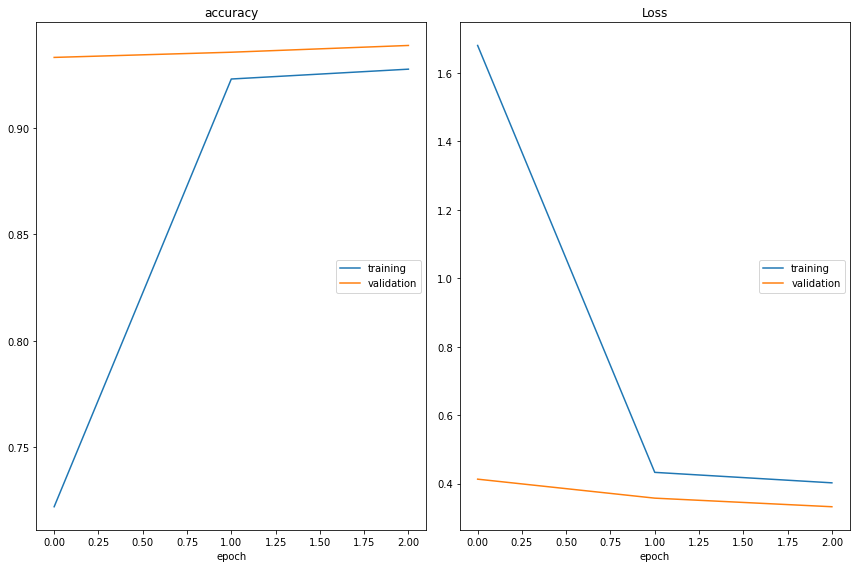

accuracy
	training         	 (min:    0.722, max:    0.927, cur:    0.927)
	validation       	 (min:    0.933, max:    0.939, cur:    0.939)
Loss
	training         	 (min:    0.402, max:    1.681, cur:    0.402)
	validation       	 (min:    0.333, max:    0.413, cur:    0.333)

Epoch 3: val_loss improved from 0.35759 to 0.33250, saving model to model_weights.h5
44/44 [==============================] - 220s 5s/step - loss: 0.4024 - accuracy: 0.9275 - val_loss: 0.3325 - val_accuracy: 0.9386
CPU times: user 16min 43s, sys: 2min 15s, total: 18min 59s
Wall time: 11min 7s


In [ ]:
%%time

chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history = model.fit(
    x=train_sentences,
    y=train_tags,
    validation_data=(val_sentences,val_tags),
    batch_size=32, 
    epochs=3,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
train_sentences.shape

(1402, 795)

In [ ]:
train_tags.shape

(1402, 795)

In [ ]:
val_sentences.shape

(351, 795)

In [ ]:
val_tags.shape

(351, 795)

In [ ]:
model.evaluate(val_sentences, val_tags)

11/11 [==============================] - 6s 539ms/step - loss: 0.3325 - accuracy: 0.9386


[0.3325033485889435, 0.9386191964149475]

In [ ]:
y_pred = model.predict(val_sentences)

In [ ]:
y_pred.shape

(351, 795, 63)

In [ ]:
val_tags

In [ ]:
y_temp = np.argmax(y_pred, axis = 2)

In [ ]:
y_temp.shape

(351, 795)

In [ ]:
val_tags.shape

(351, 795)

#DistilBERT

##Importing Model

In [ ]:
task = "ner"  # Should be one of "ner", "pos" or "chunk"
model_checkpoint = "distilbert-base-uncased"
batch_size = 8

In [ ]:
from transformers import TFAutoModelForTokenClassification

distilbert_model = TFAutoModelForTokenClassification.from_pretrained(
    model_checkpoint, num_labels=len(np.unique(data_explode.ner_tags.values))
)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForTokenClassification: ['vocab_projector', 'vocab_transform', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inferenc

In [ ]:
from transformers import create_optimizer

num_train_epochs = 3
num_train_steps = (len(train_sentences) // batch_size) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
    num_warmup_steps=0,
)

In [ ]:
import tensorflow as tf

distilbert_model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history_distilbert = distilbert_model.fit(train_sentences, train_tags, validation_data = (val_sentences,val_tags), epochs=5, batch_size=batch_size, verbose=2)

Epoch 1/5
176/176 - 164s - loss: 0.7022 - accuracy: 0.9282 - val_loss: 0.6582 - val_accuracy: 0.9262 - 164s/epoch - 933ms/step
Epoch 2/5
176/176 - 163s - loss: 0.6594 - accuracy: 0.9292 - val_loss: 0.6582 - val_accuracy: 0.9262 - 163s/epoch - 926ms/step
Epoch 3/5
176/176 - 163s - loss: 0.6593 - accuracy: 0.9292 - val_loss: 0.6582 - val_accuracy: 0.9262 - 163s/epoch - 929ms/step
Epoch 4/5
176/176 - 163s - loss: 0.6595 - accuracy: 0.9292 - val_loss: 0.6582 - val_accuracy: 0.9262 - 163s/epoch - 928ms/step
Epoch 5/5
176/176 - 163s - loss: 0.6591 - accuracy: 0.9292 - val_loss: 0.6582 - val_accuracy: 0.9262 - 163s/epoch - 927ms/step


In [ ]:
distilbert_model.save_weights('/content/drive/MyDrive/AI3/NER Project/dbert_base_uncased.h5')

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


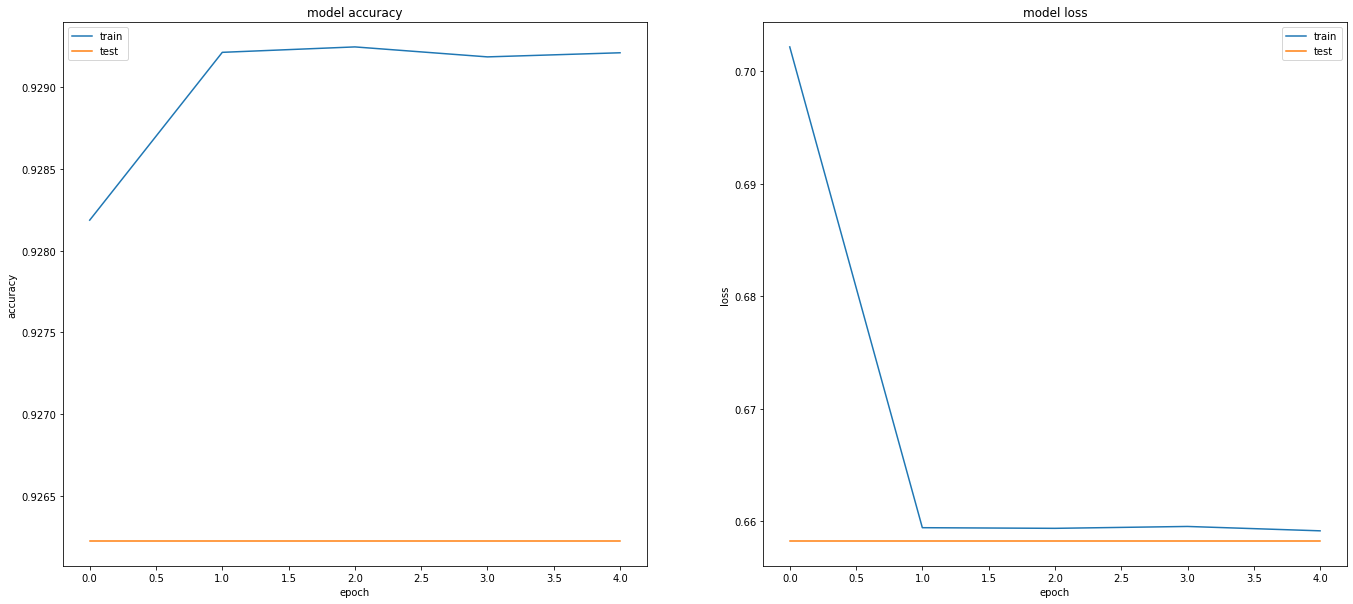

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (23, 10))

ax[0].plot(history_distilbert.history['accuracy'])
ax[0].plot(history_distilbert.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss

ax[1].plot(history_distilbert.history['loss'])
ax[1].plot(history_distilbert.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper right')
fig.show()

In [ ]:
def SOTA_NER(task, model_checkpoint, model_name, batch_size, epochs):

  SOTA_NER_model = TFAutoModelForTokenClassification.from_pretrained(model_checkpoint)
  
  num_train_steps = (len(train_sentences) // batch_size) * epochs
  optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
    num_warmup_steps=0,
  )


  EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

  checkpoint_filepath = '/content/drive/MyDrive/AI3/NER Project/' + model_name
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=True,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True)
  

  SOTA_NER_model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

  SOTA_history = SOTA_NER_model.fit(train_sentences, train_tags, validation_data = (val_sentences,val_tags), epochs=epochs, batch_size=batch_size, verbose=2, callbacks = [EarlyStop, model_checkpoint])



  fig, ax = plt.subplots(1, 2, figsize = (23, 10))
  ax[0].plot(SOTA_history.history['accuracy'])
  ax[0].plot(SOTA_history.history['val_accuracy'])
  ax[0].set_title(model_checkpoint + '_model_accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(['train', 'test'], loc='upper left')

  # summarize history for loss
  ax[1].plot(SOTA_history.history['loss'])
  ax[1].plot(SOTA_history.history['val_loss'])
  ax[1].set_title(model_checkpoint + '_model_loss')
  ax[1].set_ylabel('loss')
  ax[1].set_xlabel('epoch')
  ax[1].legend(['train', 'test'], loc='upper right')
  fig.show()

  return SOTA_history


#BERT - Large

##Importing Model

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")

model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

Downloading:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer, TFBertForTokenClassification
token_bert_model = TFBertForTokenClassification.from_pretrained('bert-base-cased')

All model checkpoint layers were used when initializing TFBertForTokenClassification.

Some layers of TFBertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Preparing Data

In [ ]:
data['tokenized_input'] = data['tokens'].map(lambda x : tokenizer(x)['input_ids'])
data['id_array'] = data['ner_ids'].map(lambda x : np.asarray(x).astype('float32'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data['tokenized_input'][0].keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
df_train, df_val = train_test_split(data[['tokenized_input', 'id_array']], train_size = 0.8)

In [ ]:
train_sentences_array = np.array(df_train['tokenized_input'])
len(train_sentences_array[0])

588

##Model Tuning

In [ ]:
input_ids = tf.keras.Input(shape=(794, ),dtype='int32')

transformer = token_bert_model(input_ids)    

output = tf.keras.layers.Dense(numlabels, activation='softmax')(transformer[0])

model = tf.keras.models.Model(inputs = input_ids, outputs = output)

model.compile(tf.keras.optimizers.Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tqdm_callback = tfa.callbacks.TQDMProgressBar()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.0 MB/s 


##Model Training

In [ ]:
automodel_hist = model.fit(train_sentences, train_tags, validation_split = 0.2, batch_size = 4, epochs = 15, verbose = 2, callbacks = [tqdm_callback])

Training:   0%|           0/15 ETA: ?s,  ?epochs/s

Epoch 1/15


0/281           ETA: ?s - 

Epoch 1/15
281/281 - 269s - loss: 1.2200 - accuracy: 0.5974 - val_loss: 1.1560 - val_accuracy: 0.6249 - 269s/epoch - 958ms/step
Epoch 2/15


0/281           ETA: ?s - 

Epoch 2/15
281/281 - 273s - loss: 1.1790 - accuracy: 0.5974 - val_loss: 1.1297 - val_accuracy: 0.6249 - 273s/epoch - 971ms/step
Epoch 3/15


0/281           ETA: ?s - 

Epoch 3/15
281/281 - 273s - loss: 1.1490 - accuracy: 0.5974 - val_loss: 1.0995 - val_accuracy: 0.6249 - 273s/epoch - 971ms/step
Epoch 4/15


0/281           ETA: ?s - 

Epoch 4/15
281/281 - 273s - loss: 1.1271 - accuracy: 0.5974 - val_loss: 1.0819 - val_accuracy: 0.6249 - 273s/epoch - 970ms/step
Epoch 5/15


0/281           ETA: ?s - 

Epoch 5/15
281/281 - 273s - loss: 1.1106 - accuracy: 0.5974 - val_loss: 1.0676 - val_accuracy: 0.6249 - 273s/epoch - 972ms/step
Epoch 6/15


0/281           ETA: ?s - 

Epoch 6/15
281/281 - 273s - loss: 1.0985 - accuracy: 0.5967 - val_loss: 1.0588 - val_accuracy: 0.6249 - 273s/epoch - 970ms/step
Epoch 7/15


0/281           ETA: ?s - 

Epoch 7/15
281/281 - 273s - loss: 1.0884 - accuracy: 0.5974 - val_loss: 1.0523 - val_accuracy: 0.6249 - 273s/epoch - 971ms/step
Epoch 8/15


0/281           ETA: ?s - 

Epoch 8/15
281/281 - 273s - loss: 1.0831 - accuracy: 0.5974 - val_loss: 1.0479 - val_accuracy: 0.6249 - 273s/epoch - 971ms/step
Epoch 9/15


0/281           ETA: ?s - 

Epoch 9/15
281/281 - 273s - loss: 1.0798 - accuracy: 0.5974 - val_loss: 1.0481 - val_accuracy: 0.6249 - 273s/epoch - 970ms/step
Epoch 10/15


0/281           ETA: ?s - 

Epoch 10/15
281/281 - 272s - loss: 1.0775 - accuracy: 0.5974 - val_loss: 1.0476 - val_accuracy: 0.6249 - 272s/epoch - 970ms/step
Epoch 11/15


0/281           ETA: ?s - 

Epoch 11/15
281/281 - 273s - loss: 1.0743 - accuracy: 0.5974 - val_loss: 1.0399 - val_accuracy: 0.6249 - 273s/epoch - 971ms/step
Epoch 12/15


0/281           ETA: ?s - 

Epoch 12/15
281/281 - 273s - loss: 1.0727 - accuracy: 0.5974 - val_loss: 1.0395 - val_accuracy: 0.6249 - 273s/epoch - 971ms/step
Epoch 13/15


0/281           ETA: ?s - 

Epoch 13/15
281/281 - 273s - loss: 1.0722 - accuracy: 0.5974 - val_loss: 1.0432 - val_accuracy: 0.6249 - 273s/epoch - 971ms/step
Epoch 14/15


0/281           ETA: ?s - 

Epoch 14/15
281/281 - 273s - loss: 1.0734 - accuracy: 0.5974 - val_loss: 1.0384 - val_accuracy: 0.6249 - 273s/epoch - 971ms/step
Epoch 15/15


0/281           ETA: ?s - 

Epoch 15/15
281/281 - 273s - loss: 1.0705 - accuracy: 0.5974 - val_loss: 1.0408 - val_accuracy: 0.6249 - 273s/epoch - 972ms/step


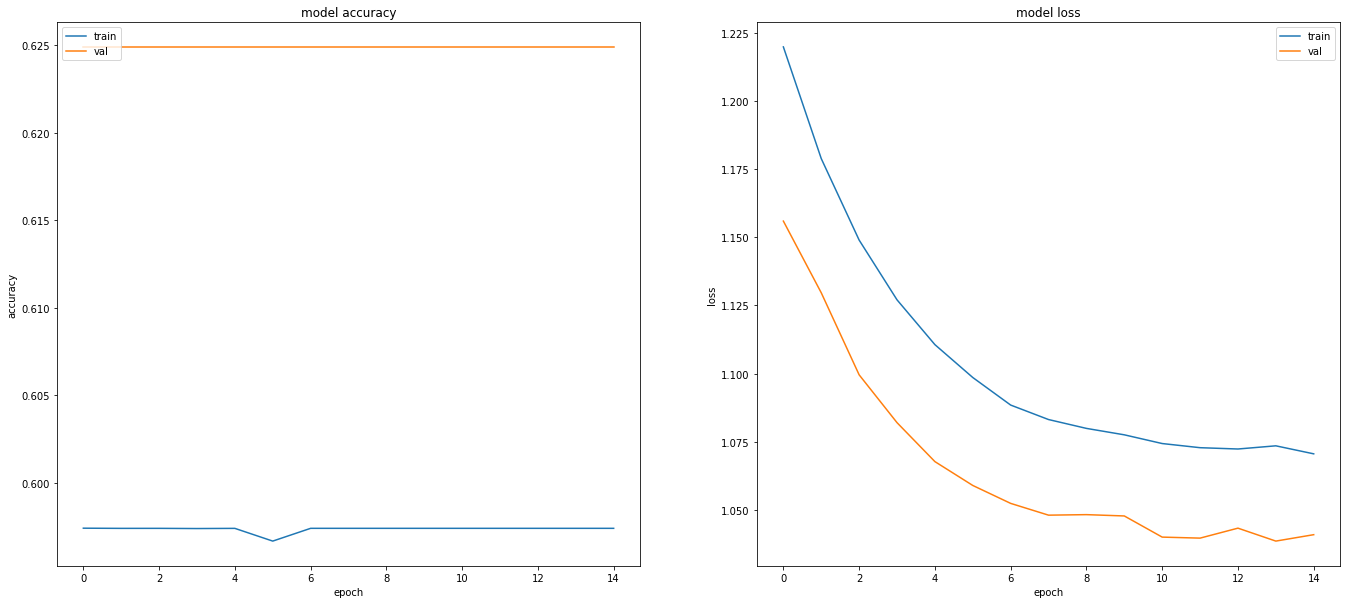

In [ ]:
def plot(h):

  fig, ax = plt.subplots(1, 2, figsize = (23, 10))

  ax[0].plot(h.history['accuracy'])
  ax[0].plot(h.history['val_accuracy'])
  ax[0].set_title('model accuracy')
  ax[0].set_ylabel('accuracy')
  ax[0].set_xlabel('epoch')
  ax[0].legend(['train', 'val'], loc='upper left')

  # summarize history for loss

  ax[1].plot(h.history['loss'])
  ax[1].plot(h.history['val_loss'])
  ax[1].set_title('model loss')
  ax[1].set_ylabel('loss')
  ax[1].set_xlabel('epoch')
  ax[1].legend(['train', 'val'], loc='upper right')
  fig.show()

plot(automodel_hist)